In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
import seaborn as sns
import datetime
import csv

%matplotlib inline

In [2]:
df = pd.read_csv('ML_Bond_metadata.csv', header=0)
data = pd.read_csv('dataset.csv', header=0)
avg = pd.read_csv('avgvol.csv', header=0)
det = pd.read_csv('details.csv', header=0)

In [3]:
p=df[df['isin']=='isin10033']
p.index+4

Int64Index([10000], dtype='int64')

In [4]:
data.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17261 entries, 0 to 17260
Data columns (total 24 columns):
isin                          17261 non-null object
issuer                        17261 non-null object
issue date                    17260 non-null object
Market                        17261 non-null object
amtIssued                     17261 non-null int64
amtOutstanding                17261 non-null int64
collateralType                17261 non-null object
coupon                        17261 non-null float64
couponFrequency               16553 non-null float64
couponType                    17261 non-null object
industryGroup                 17261 non-null object
industrySector                17261 non-null object
industrySubgroup              17261 non-null object
maturity                      17023 non-null object
maturityType                  17261 non-null object
securityType                  17261 non-null object
paymentRank                   17261 non-null object
144aFla

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
tod = ['Morning', 'Afternoon']

data['days'] = data['date'].apply(lambda x: months.index(x[-7:-4])*30 + int(x[:-7]))
data['days'] += data['timeofday'].apply(lambda x: 0.5*tod.index(x))
data.head(20)

,isin,time,price,side,volume,timeofday,date,days
0,isin10033,Mon 16May16 02:51:27.000 pm,117.363618,S,730000,Afternoon,16May2016,136.5
1,isin10033,Mon 16May16 03:45:52.000 pm,115.715329,B,730000,Afternoon,16May2016,136.5
2,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016,96.0
3,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016,96.0
4,isin10033,Wed 6Apr16 08:25:00.000 am,115.558250,S,5000,Morning,6Apr2016,96.0
5,isin10033,Fri 22Apr16 11:13:28.000 am,122.588087,S,40000,Morning,22Apr2016,112.0
6,isin10033,Fri 22Apr16 11:13:28.000 am,122.588087,S,40000,Morning,22Apr2016,112.0
7,isin10033,Thu 19May16 09:00:03.000 am,123.529518,S,20000,Morning,19May2016,139.0
8,isin10033,Mon 18Apr16 12:44:32.000 pm,115.155079,B,5000,Afternoon,18Apr2016,108.5
9,isin10033,Mon 18Apr16 12:44:32.000 pm,115.155079,B,5000,Afternoon,18Apr2016,108.5


In [6]:
"""fw = open('avgvol.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'avgvol'))
i=0
while i<data.shape[0]:
    j=i+1
    while j<data.shape[0] and data['isin'][j]==data['isin'][i]:
        if j%100000==0:
            print j
        j=j+1
    writer.writerow((data['isin'][i], data['volume'][i:j].mean()))
    i=j
    
fw.close()

for i in range(df.shape[0]):
    df['collateralType'][i] = int(df['collateralType'][i][14:])
    df['ratingAgency1Rating'][i] = int(df['ratingAgency1Rating'][i][6:])
    df['ratingAgency2Rating'][i] = int(df['ratingAgency2Rating'][i][6:])
    df['paymentRank'][i] = int(df['paymentRank'][i][11:])
    df['securityType'][i] = int(df['securityType'][i][12:])
    if i%1000==0:
        print i

fw = open('details.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'collateralType', 'ratingAgency1Rating', 'ratingAgency2Rating', 'paymentRank', 'securityType'))
for i in range(df.shape[0]):
    writer.writerow((df['isin'][i], df['collateralType'][i], df['ratingAgency1Rating'][i],
                     df['ratingAgency2Rating'][i], df['paymentRank'][i], df['securityType'][i]))
    if i%1000==0:
        print i
    
fw.close()"""

df['avgvol'] = avg['avgvol']
df['collateralType'] = det['collateralType']
df['ratingAgency1Rating'] = det['ratingAgency1Rating']
df['ratingAgency2Rating'] = det['ratingAgency2Rating']
df['paymentRank'] = det['paymentRank']
df['securityType'] = det['securityType']
df.head(30)

,isin,issuer,issue date,Market,amtIssued,amtOutstanding,collateralType,coupon,couponFrequency,couponType,...,securityType,paymentRank,144aFlag,ratingAgency1Rating,ratingAgency1Watch,ratingAgency1EffectiveDate,ratingAgency2Rating,ratingAgency2Watch,ratingAgency2EffectiveDate,avgvol
0,isin0,issuer490,8Dec2011,Market2,183260000,183260000,19,10.000,2.0,couponType1,...,3,3,flag0,0,4,NaN,0,4,NaN,3.888000e+06
1,isin1,issuer1193,10-Sep-10,Market2,261800000,198970000,26,5.500,2.0,couponType1,...,5,8,flag0,0,4,NaN,0,4,NaN,1.843235e+06
2,isin2,issuer2943,14-Nov-14,Market2,78540000,78540000,28,5.750,2.0,couponType1,...,5,9,flag1,0,4,NaN,0,4,NaN,3.870000e+06
3,isin3,issuer3707,4Mar2013,Market1,1570800000,1570800000,28,4.750,1.0,couponType6,...,2,9,flag0,18,4,16-Mar-16,22,4,2May2013,1.250755e+06
4,isin4,issuer3711,25-Nov-14,Market0,1309000000,1309000000,12,7.125,1.0,couponType6,...,3,5,flag0,15,4,16-Mar-16,0,4,NaN,3.400000e+05
5,isin5,issuer3711,25-Nov-14,Market0,1309000000,1309000000,12,7.000,1.0,couponType6,...,3,5,flag0,15,4,16-Mar-16,0,4,NaN,1.483168e+06
6,isin6,issuer3278,17-Dec-12,Market1,523600000,523600000,5,1.500,1.0,couponType1,...,2,8,flag0,5,4,24-Dec-12,1,4,7Nov2014,8.056250e+05
7,isin7,issuer2238,3Sep1985,Market1,523600000,135720000,12,1.000,4.0,couponType3,...,3,5,flag0,19,4,19-Mar-15,16,4,11-Feb-14,3.900000e+06
8,isin8,issuer404,25-Nov-13,Market0,837760000,772920000,22,7.375,2.0,couponType1,...,5,2,flag1,16,4,17-Apr-14,0,4,NaN,7.878571e+05
9,isin9,issuer1167,27-Feb-14,Market1,418880000,418880000,22,2.803,2.0,couponType1,...,5,2,flag1,19,4,27-Mar-14,16,4,7Mar2014,4.000000e+05


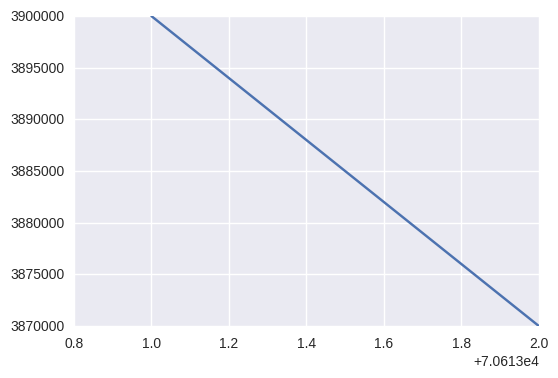

In [7]:
temp = data[data['isin']=='isin0']
a = temp[temp['side']=='B']
plt.plot(a['volume'])

[[535275.47089112026, 8], [726730.55728049774, 18], [824072.23759645456, 17], [939232.74042480998, 19], [974208.06517225958, 15], [988381.20414095873, 0], [1001476.7833485882, 16], [1035412.80106927, 14], [1052834.7969855072, 6], [1098559.6949249217, 4], [1142627.5510204099, 3], [1173625.9485263387, 11], [1178461.0761930957, 25], [1209086.482984008, 12], [1254242.4681863913, 24], [1318889.2222976068, 26], [1358154.033908698, 13], [1390333.6318166712, 21], [1399704.4692102014, 23], [1415197.36842105, 2], [1425565.1026109548, 20], [1429341.2600836395, 5], [1477505.6438464925, 9], [1482876.3741255836, 7], [1513350.9677026868, 10], [1593894.9140502664, 22], [1744460.0938967101, 1]]
[8, 18, 17, 19, 15, 0, 16, 14, 6, 4, 3, 11, 25, 12, 24, 26, 13, 21, 23, 2, 20, 5, 9, 7, 10, 22, 1]
[535275.47089112026, 726730.55728049774, 824072.23759645456, 939232.74042480998, 974208.06517225958, 988381.20414095873, 1001476.7833485882, 1035412.80106927, 1052834.7969855072, 1098559.6949249217, 1142627.5510204

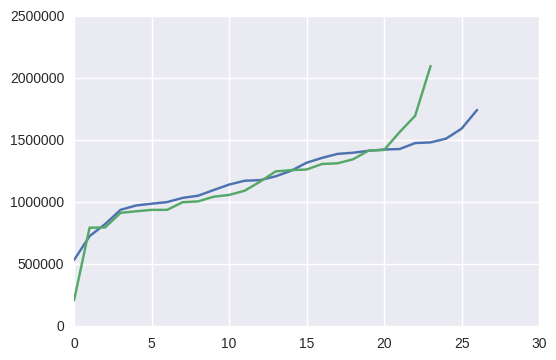

In [8]:
ratings = []
z = df.sort_values('ratingAgency1Rating').reset_index(drop=True)
i=0
while i<z.shape[0]:
    j=i+1
    while j<z.shape[0] and z['ratingAgency1Rating'][j]==z['ratingAgency1Rating'][i]:
        if j%100000==0:
            print j
        j=j+1
    ratings.append([z[i:j]['avgvol'].mean(), z['ratingAgency1Rating'][i]])
    i=j
    
ratings.sort()
print ratings
ratval1 = []
for i in range(len(ratings)):
    ratval1.append(ratings[i][0])
    ratings[i] = ratings[i][1]
print ratings
print ratval1
plt.plot(ratval1)

ratings = []
z = df.sort_values('ratingAgency2Rating').reset_index(drop=True)
i=0
while i<z.shape[0]:
    j=i+1
    while j<z.shape[0] and z['ratingAgency2Rating'][j]==z['ratingAgency2Rating'][i]:
        if j%100000==0:
            print j
        j=j+1
    ratings.append([z[i:j]['avgvol'].mean(), z['ratingAgency2Rating'][i]])
    i=j
    
ratings.sort()
print ratings
ratval2 = []
for i in range(len(ratings)):
    ratval2.append(ratings[i][0])
    ratings[i] = ratings[i][1]
print ratings
print ratval2
plt.plot(ratval2)

In [9]:
rat1order = [8, 18, 17, 19, 15, 0, 16, 14, 6, 4, 3, 11, 25, 12, 24, 26, 13, 21, 23, 2, 20, 5, 9, 7, 10, 22, 1]
rat2order = [22, 14, 15, 12, 3, 11, 2, 23, 13, 16, 8, 9, 18, 0, 1, 10, 21, 6, 19, 20, 4, 17, 5, 7]
rat1val = [535275.47089112026, 726730.55728049774, 824072.23759645456, 939232.74042480998, 
           974208.06517225958, 988381.20414095873, 1001476.7833485882, 1035412.80106927, 
           1052834.7969855072, 1098559.6949249217, 1142627.5510204099, 1173625.9485263387, 
           1178461.0761930957, 1209086.482984008, 1254242.4681863913, 1318889.2222976068, 
           1358154.033908698, 1390333.6318166712, 1399704.4692102014, 1415197.36842105, 
           1425565.1026109548, 1429341.2600836395, 1477505.6438464925, 1482876.3741255836, 
           1513350.9677026868, 1593894.9140502664, 1744460.0938967101]
rat2val = [210830.98564075952, 794951.65401766938, 796820.12817960477, 914720.324723572, 
           927302.73562433117, 938733.37379799434, 938757.85742998624, 1000355.6154423188, 
           1007196.4937989194, 1044899.9288844019, 1059137.1561855921, 1093091.3563735723, 
           1166080.4117162148, 1248931.4981518511, 1259252.9317007354, 1264160.0178640792, 
           1308982.8299020159, 1314306.4365542016, 1346816.5142456852, 1416979.8317957646, 
           1421973.4734017139, 1565710.9365773317, 1697174.2612568527, 2099103.4279058669]

In [10]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
r1m = max(rat1val)
r2m = max(rat2val)

fw = open('rat_order.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
i=0
while i<data.shape[0]:
    j=i+1
    while j<data.shape[0] and data['isin'][j]==data['isin'][i]:
        if j%100000==0:
            print j
        j=j+1
    temp = data[i:j]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    temp = df[df['isin']==data['isin'][i]]
    #print temp
    p = rat1val[rat1order.index(temp['ratingAgency1Rating'].any())]
    q = rat2val[rat2order.index(temp['ratingAgency2Rating'].any())]
    
    x*=((p/r1m)*(q/r2m))
    y*=((p/r1m)*(q/r2m))
    writer.writerow((data['isin'][i], x, y))
    i=j
    
fw.close()

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000


In [124]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
ami = log(df['amtIssued'].max())
amo = log(df['amtOutstanding'].max())
r1m = max(rat1val)
r2m = max(rat2val)

fw = open('amoi_log_rat.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
i=0
while i<data.shape[0]:
    j=i+1
    while j<data.shape[0] and data['isin'][j]==data['isin'][i]:
        if j%100000==0:
            print j
        j=j+1
    temp = data[i:j]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    temp = df[df['isin']==data['isin'][i]]
    p = rat1val[rat1order.index(temp['ratingAgency1Rating'].item())]
    q = rat2val[rat2order.index(temp['ratingAgency2Rating'].item())]
    
    x*=((log(temp['amtIssued'])/ami)*(log(temp['amtOutstanding'])/amo)*(p/r1m)*(q/r2m))
    y*=((log(temp['amtIssued'])/ami)*(log(temp['amtOutstanding'])/amo)*(p/r1m)*(q/r2m))
    writer.writerow((data['isin'][i], x, y))
    i=j
fw.close()

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000


In [126]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
ami = log(df['amtIssued'].max())
amo = log(df['amtOutstanding'].max())

fw = open('amoi_log_inv_w.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
i=0
while i<data.shape[0]:
    j=i+1
    while j<data.shape[0] and data['isin'][j]==data['isin'][i]:
        if j%100000==0:
            print j
        j=j+1
    temp = data[i:j]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    temp = df[df['isin']==data['isin'][i]]
    
    p=temp['ratingAgency1Watch'].item()
    q=temp['ratingAgency2Watch'].item()
    x*=((ami/log(temp['amtIssued']))*(amo/log(temp['amtOutstanding']))*p*q)
    y*=((ami/log(temp['amtIssued']))*(amo/log(temp['amtOutstanding']))*p*q)
    writer.writerow((data['isin'][i], x, y))
    i=j
fw.close()

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000


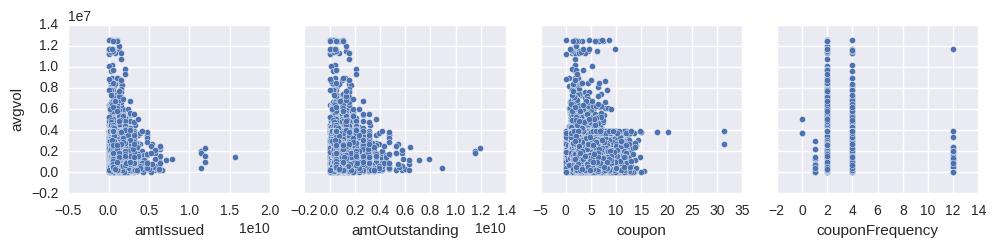

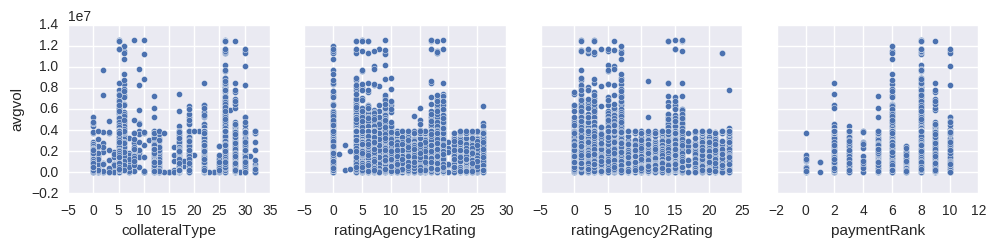

In [89]:
cols = ['amtIssued', 'amtOutstanding', 'coupon', 'couponFrequency', 'collateralType',
        'ratingAgency1Rating', 'ratingAgency2Rating', 'paymentRank']
sns.pairplot(df, x_vars=cols[:4], y_vars=['avgvol'])
sns.pairplot(df, x_vars=cols[4:], y_vars=['avgvol'])

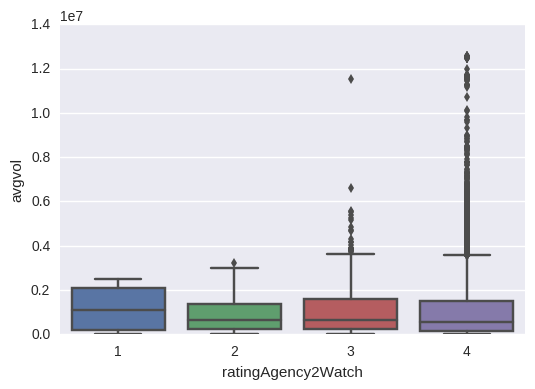

In [90]:
cols = ['ratingAgency1Watch', 'couponType', 'securityType', 'ratingAgency2Watch']
sns.boxplot(x=cols[3], y='avgvol', data=df.sort_values(cols[3]).reset_index(drop=True))

In [192]:
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
amo = df['amtOutstanding'].max()

fw = open('amo.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)*(float(df['amtOutstanding'][i])/amo)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)*(float(df['amtOutstanding'][i])/amo)
    if x==0:
        x = bm
    if y==0:
        y = sm
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
fw.close()

0 3973.61712601 5968.09676455
500 22251.2330956 41526.0888845
1000 219.173586653 11283
1500 8499.17216903 3249.68347639
2000 3857.45512509 37142.6171514
2500 10872 1037.42164349
3000 1176.2315817 1132.39686437
3500 382348.321916 351116.085818
4000 39378.1877353 70410.2452908
4500 167469.076404 237591.473718
5000 16867.5992288 21601.7487005
5500 2659.30618472 3907.1344714
6000 29.9595837655 20.7882826128
6500 43.3184566541 41.1021635229
7000 10872 58.446289774
7500 854.776987945 1065.18363113
8000 6325.3497108 8411.88225573
8500 26569.6833313 38644.6867986
9000 61901.9266569 44302.2876487
9500 2040.50609174 688.205062089
10000 56920.8416109 63501.8938395
10500 19725.6227987 473.41494717
11000 3053.81864069 7174.28206976
11500 13.1504151992 11283
12000 16238.8288864 609.248991408
12500 3430.79720974 3553.53441826
13000 260487.807737 258149.956146
13500 184339.597947 80480.5410189
14000 1718.32091936 859.160459679
14500 35462.2863204 27162.9131725
15000 172445.777978 242639.771997
15500 8

In [193]:
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
ami = df['amtIssued'].max()

fw = open('ami.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)*(float(df['amtIssued'][i])/amo)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)*(float(df['amtIssued'][i])/amo)
    if x==0:
        x = bm
    if y==0:
        y = sm
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
fw.close()

0 3973.61712601 5968.09676455
500 22251.2330956 41526.0888845
1000 219.173586653 11283
1500 12916.6300401 4938.71148591
2000 3857.45512509 37142.6171514
2500 10872 1037.42164349
3000 1176.2315817 1132.39686437
3500 382348.321916 351116.085818
4000 39378.1877353 70410.2452908
4500 167469.076404 237591.473718
5000 16867.5992288 21601.7487005
5500 2659.30618472 3907.1344714
6000 29.9595837655 20.7882826128
6500 43.3184566541 41.1021635229
7000 10872 58.446289774
7500 854.776987945 1065.18363113
8000 6325.3497108 8411.88225573
8500 26569.6833313 38644.6867986
9000 61901.9266569 44302.2876487
9500 2040.50609174 688.205062089
10000 56920.8416109 63501.8938395
10500 21917.3586653 526.016607966
11000 3053.81864069 7174.28206976
11500 13.1504151992 11283
12000 26327.1312287 987.742297181
12500 3430.79720974 3553.53441826
13000 260487.807737 258149.956146
13500 184339.597947 80480.5410189
14000 1718.32091936 859.160459679
14500 35462.2863204 27162.9131725
15000 172445.777978 242639.771997
15500 

In [194]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
amo = log(df['amtOutstanding'].max())

fw = open('amo_log.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
fw1 = open('amo_log1.csv', 'w')
wr = csv.writer(fw1)
wr.writerow(('isin', 'buyvolume', 'sellvolume'))
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    x*=(log(df['amtOutstanding'][i])/amo)
    y*=(log(df['amtOutstanding'][i])/amo)
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
    wr.writerow((df['isin'][i], x/10.0, y/10.0))
fw.close()
fw1.close()

0 212374.317669 318971.465533
500 616283.254474 1150131.01042
1000 13555.5776046 9176.85492676
1500 129219.651338 49407.5137467
2000 39384.1578352 379221.70158
2500 9081.92103201 39539.8818539
3000 44830.4294259 43159.7301926
3500 2653293.65036 2436558.57144
4000 564488.886577 1009335.4533
4500 1995835.26473 2831528.37543
5000 411546.139105 527052.851743
5500 73653.7100267 108214.297039
6000 11897.8862984 8255.67620707
6500 25458.622493 24156.088319
7000 8327.82109427 10213.1727916
7500 52866.7526579 65880.1071583
8000 391213.969669 520263.068464
8500 648263.599574 942877.017242
9000 1221837.74737 874451.091711
9500 243134.441176 82002.3786566
10000 1388789.96838 1549358.55903
10500 430340.676591 10328.1762382
11000 60277.1365988 141608.009904
11500 813.334656276 9176.85492676
12000 395335.692765 14832.2193534
12500 83706.716443 86701.3349188
13000 2150498.69804 2131198.19086
13500 972448.572117 424559.823654
14000 28520.5981727 14260.2990863
14500 699964.643662 536149.267642
15000 340

In [195]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
ami = log(df['amtIssued'].max())

fw = open('ami_log.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
fw1 = open('ami_log1.csv', 'w')
wr = csv.writer(fw1)
wr.writerow(('isin', 'buyvolume', 'sellvolume'))
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    x*=(log(df['amtIssued'][i])/ami)
    y*=(log(df['amtIssued'][i])/ami)
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
    wr.writerow((df['isin'][i], x/10.0, y/10.0))
fw.close()
fw1.close()

0 209896.958301 315250.643935
500 609094.272725 1136714.66204
1000 13397.4509651 9069.80635438
1500 130338.89955 49835.4615926
2000 38924.7392321 374798.057303
2500 8975.9798693 39078.6467206
3000 44307.4797325 42656.2693077
3500 2622342.81811 2408135.96711
4000 557904.089289 997561.493679
4500 1972553.72465 2798498.42425
5000 406745.428293 520904.748085
5500 72794.5350074 106951.970665
6000 11759.0967291 8159.37324063
6500 25161.646109 23874.3060755
7000 8230.67655332 10094.0355081
7500 52250.058764 65111.6116905
8000 386650.434854 514194.168042
8500 640701.56515 931878.299333
9000 1207584.93553 864250.566396
9500 240298.263092 81045.8159085
10000 1372589.6487 1531285.19695
10500 427564.594194 10261.5502606
11000 59574.0001243 139956.143833
11500 803.847057908 9069.80635438
12000 400232.612684 15015.9421786
12500 82730.2724907 85689.9585594
13000 2125412.99958 2106337.63399
13500 961104.900217 419607.307419
14000 28187.9036556 14093.9518278
14500 691799.513405 529895.053737
15000 3364

In [10]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
ami = df['amtIssued'].max()
amo = df['amtOutstanding'].max()

fw = open('amoi_log_z.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
i=0
while i<data.shape[0]:
    j=i+1
    while j<data.shape[0] and data['isin'][j]==data['isin'][i]:
        if j%100000==0:
            print j
        j=j+1
    temp = data[i:j]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    temp = df[df['isin']==data['isin'][i]]
    
    p=(log(temp['amtIssued']))/(log(float(ami)))
    q=(log(temp['amtOutstanding']))/(log(float(amo)))
    p=p*p
    q=q*q
    #p=pow(2, log(float(ami))/log(temp['amtIssued']))
    #q=pow(2, log(float(amo))/log(temp['amtOutstanding']))
    x*=(p*q)
    y*=(p*q)
    writer.writerow((data['isin'][i], x, y))
    i=j
fw.close()

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000


In [200]:
from math import log
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])
ami = log(df['amtIssued'].max())
amo = log(df['amtOutstanding'].max())

fw = open('amoi_log_inv.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
i=0
while i<data.shape[0]:
    j=i+1
    while j<data.shape[0] and data['isin'][j]==data['isin'][i]:
        if j%100000==0:
            print j
        j=j+1
    temp = data[i:j]
    x = (temp['volume'][temp['side'] == 'B'].sum()/30.0)
    y = (temp['volume'][temp['side'] == 'S'].sum()/30.0)
    if x==0:
        x = bm
    if y==0:
        y = sm
    temp = df[df['isin']==data['isin'][i]]
    x*=((ami/log(temp['amtIssued']))*(amo/log(temp['amtOutstanding'])))
    y*=((ami/log(temp['amtIssued']))*(amo/log(temp['amtOutstanding'])))
    writer.writerow((data['isin'][i], x, y))
    i=j
fw.close()

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000


In [177]:
t1 = data[data['isin'] == 'isin10033'].sort_values('days')
t1.reset_index(drop=True).head(10)

,isin,time,price,side,volume,timeofday,date,days
0,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016,96.0
1,isin10033,Wed 6Apr16 08:24:07.000 am,115.296450,B,5000,Morning,6Apr2016,96.0
2,isin10033,Wed 6Apr16 08:25:00.000 am,115.558250,S,5000,Morning,6Apr2016,96.0
3,isin10033,Mon 18Apr16 12:44:32.000 pm,115.155079,B,5000,Afternoon,18Apr2016,108.5
4,isin10033,Mon 18Apr16 12:44:32.000 pm,115.155079,B,5000,Afternoon,18Apr2016,108.5
5,isin10033,Fri 22Apr16 11:13:28.000 am,122.588087,S,40000,Morning,22Apr2016,112.0
6,isin10033,Fri 22Apr16 11:13:28.000 am,122.588087,S,40000,Morning,22Apr2016,112.0
7,isin10033,Mon 16May16 02:51:27.000 pm,117.363618,S,730000,Afternoon,16May2016,136.5
8,isin10033,Mon 16May16 03:45:52.000 pm,115.715329,B,730000,Afternoon,16May2016,136.5
9,isin10033,Thu 19May16 09:00:03.000 am,123.529518,S,20000,Morning,19May2016,139.0


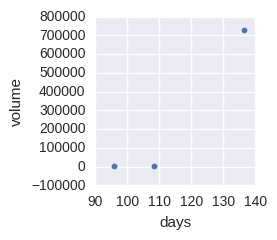

In [178]:
sns.pairplot(t1[t1['side']=='B'], x_vars=['days'], y_vars=['volume'])

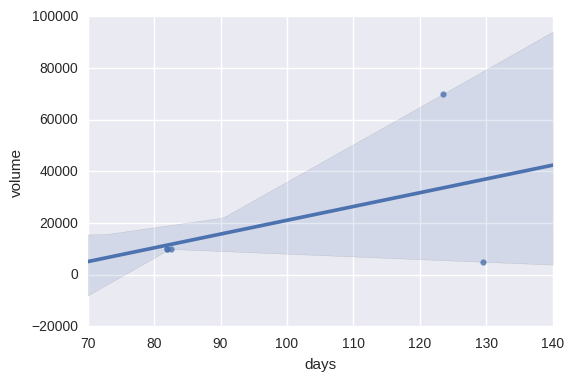

In [179]:
t1 = data[data['isin'] == 'isin10003'].sort_values('days')
sns.regplot(x='days', y='volume', data=t1[t1['side']=='B'])

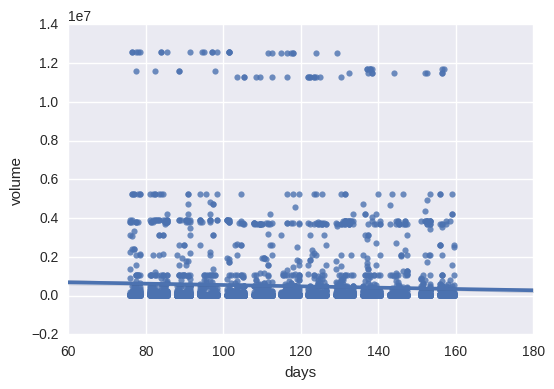

In [180]:
sns.regplot(x='days', y='volume', data=data[data['side']=='S'][:5000])

In [122]:
fw = open('x1.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = temp['volume'][temp['side'] == 'B'].sum()
    y = temp['volume'][temp['side'] == 'S'].sum()
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x/30, y/30))
fw.close()

0 7770000 11670000
500 21755000 40600000
1000 500000 0
1500 4420000 1690000
2000 1320000 12710000
2500 0 1420000
3000 1610000 1550000
3500 87225000 80100000
4000 19250000 34420000
4500 67420000 95650000
5000 14430000 18480000
5500 2600000 3820000
6000 490000 340000
6500 1075000 1020000
7000 0 400000
7500 1950000 2430000
8000 14430000 19190000
8500 22730000 33060000
9000 42365000 30320000
9500 9310000 3140000
10000 48695000 54325000
10500 15000000 360000
11000 2090000 4910000
11500 30000 0
12000 13860000 520000
12500 2935000 3040000
13000 71310000 70670000
13500 31540000 13770000
14000 980000 490000
14500 24270000 18590000
15000 118020000 166060000
15500 650000 100000
16000 710000 680000
16500 20000 0
17000 0 3870000


In [184]:
bm = data['volume'][data['side'] == 'B'].sum()/(30*data.shape[0])
sm = data['volume'][data['side'] == 'S'].sum()/(30*data.shape[0])

fw = open('x2.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = temp['volume'][temp['side'] == 'B'].sum()/30
    y = temp['volume'][temp['side'] == 'S'].sum()/30
    if x==0:
        x = bm
    if y==0:
        y = sm
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
fw.close()

0 259000 389000
500 725166 1353333
1000 16666 11283
1500 147333 56333
2000 44000 423666
2500 10872 47333
3000 53666 51666
3500 2907500 2670000
4000 641666 1147333
4500 2247333 3188333
5000 481000 616000
5500 86666 127333
6000 16333 11333
6500 35833 34000
7000 10872 13333
7500 65000 81000
8000 481000 639666
8500 757666 1102000
9000 1412166 1010666
9500 310333 104666
10000 1623166 1810833
10500 500000 12000
11000 69666 163666
11500 1000 11283
12000 462000 17333
12500 97833 101333
13000 2377000 2355666
13500 1051333 459000
14000 32666 16333
14500 809000 619666
15000 3934000 5535333
15500 21666 3333
16000 23666 22666
16500 666 11283
17000 10872 129000


In [11]:
fw = open('a2.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
bm = data['volume'][data['side'] == 'B'].mean()
sm = data['volume'][data['side'] == 'S'].mean()
for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    x = temp['volume'][temp['side'] == 'B'].mean()
    y = temp['volume'][temp['side'] == 'S'].mean()
    if np.isnan(x):
        x = bm
    if np.isnan(y):
        y = sm
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
fw.close()

0 3885000.0 3890000.0
500 1450333.33333 1765217.3913
1000 125000.0 nan
1500 736666.666667 422500.0
2000 660000.0 6355000.0
2500 nan 473333.333333
3000 230000.0 516666.666667
3500 555573.248408 305725.19084
4000 740384.615385 1496521.73913
4500 2043030.30303 3298275.86207
5000 1110000.0 1421538.46154
5500 288888.888889 424444.444444
6000 70000.0 15454.5454545
6500 51190.4761905 30000.0
7000 nan 36363.6363636
7500 27857.1428571 39836.0655738
8000 1603333.33333 2132222.22222
8500 988260.869565 1001818.18182
9000 1176805.55556 618775.510204
9500 2327500.0 785000.0
10000 87267.0250896 42809.2986604
10500 3750000.0 360000.0
11000 2090000.0 1227500.0
11500 30000.0 nan
12000 1980000.0 520000.0
12500 45153.8461538 98064.516129
13000 3565500.0 2944583.33333
13500 2867272.72727 1147500.0
14000 490000.0 490000.0
14500 591951.219512 244605.263158
15000 5131304.34783 4488108.10811
15500 216666.666667 100000.0
16000 236666.666667 226666.666667
16500 20000.0 nan
17000 nan 3870000.0


In [104]:
fw = open('last_two.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
bm = data['volume'][data['side'] == 'B'].mean()
sm = data['volume'][data['side'] == 'S'].mean()
print bm, sm

for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    db = temp[temp['side'] == 'B'].sort_values('days').reset_index(drop=True)
    ds = temp[temp['side'] == 'S'].sort_values('days').reset_index(drop=True)
    x = db['volume'].mean()
    y = ds['volume'].mean()
    #print ds.head(10), db.head(10)
    
    if db.shape[0]==0 or np.isnan(x):
        x = bm
    elif db.shape[0]==1:
        x = db['volume'][0]
    else:
        j = db.shape[0]-1
        x2, y2 = db['days'][j], db['volume'][j]
        while j>=0 and np.isnan(y2):
            j=j-1
            x2, y2 = db['days'][j], db['volume'][j]
        j=j-1
        x1, y1 = db['days'][j], db['volume'][j]
        while j>=0 and np.isnan(y1):
            j=j-1
            x1, y1 = db['days'][j], db['volume'][j]
        if j<0:
            x = y2
        elif x1==x2:
            x2=x1+0.5
            x = y1 + ((y2-y1)*(162-x1))/(x2-x1)
            if x<0:
                x = db['volume'].mean()
        
    if ds.shape[0]==0 or np.isnan(y):
        y = sm
    elif ds.shape[0]==1:
        y = ds['volume'][0]
    else:
        j = ds.shape[0]-1
        x2, y2 = ds['days'][j], ds['volume'][j]
        while j>=0 and np.isnan(y2):
            j=j-1
            x2, y2 = ds['days'][j], ds['volume'][j]
        j=j-1
        x1, y1 = ds['days'][j], ds['volume'][j]
        while j>=0 and np.isnan(y1):
            j=j-1
            x1, y1 = ds['days'][j], ds['volume'][j]
        if j<0:
            y = y2
        elif x1==x2:
            x2=x1+0.5
            y = y1 + ((y2-y1)*(162-x1))/(x2-x1)
            if y<0:
                y = ds['volume'].mean()
        
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
fw.close()

799975.162284 571544.31174
0 3885000.0 3890000.0
500 1450333.33333 40000.0
1000 10000.0 571544.31174
1500 10000.0 43730000.0
2000 660000.0 6355000.0
2500 799975.162284 473333.333333
3000 230000.0 516666.666667
3500 555573.248408 305725.19084
4000 150000.0 5080000.0
4500 2043030.30303 3298275.86207
5000 1110000.0 1421538.46154
5500 180000.0 424444.444444
6000 70000.0 15454.5454545
6500 51190.4761905 20000.0
7000 799975.162284 30000.0
7500 50000.0 50000.0
8000 1603333.33333 2132222.22222
8500 988260.869565 50000.0
9000 1176805.55556 140000.0
9500 2327500.0 785000.0
10000 30000.0 70000.0
10500 3750000.0 360000
11000 2090000 1227500.0
11500 30000 571544.31174
12000 30000.0 520000
12500 10000.0 1000000.0
13000 3565500.0 2944583.33333
13500 2867272.72727 1147500.0
14000 490000.0 490000
14500 591951.219512 244605.263158
15000 5131304.34783 11720000.0
15500 216666.666667 100000
16000 236666.666667 226666.666667
16500 20000 571544.31174
17000 799975.162284 3870000


In [106]:
fw = open('last_two_max_lim.csv', 'w')
writer = csv.writer(fw)
writer.writerow(('isin', 'buyvolume', 'sellvolume'))
bm = data['volume'][data['side'] == 'B'].mean()
sm = data['volume'][data['side'] == 'S'].mean()
bmax = data['volume'][data['side'] == 'B'].max()
smax = data['volume'][data['side'] == 'S'].max()
print bm, sm

for i in range(df.shape[0]):
    temp = data[data['isin'] == df['isin'][i]]
    db = temp[temp['side'] == 'B'].sort_values('days').reset_index(drop=True)
    ds = temp[temp['side'] == 'S'].sort_values('days').reset_index(drop=True)
    x = db['volume'].mean()
    y = ds['volume'].mean()
    #print ds.head(10), db.head(10)
    
    if db.shape[0]==0 or np.isnan(x):
        x = bm
    elif db.shape[0]==1:
        x = db['volume'][0]
    else:
        j = db.shape[0]-1
        x2, y2 = db['days'][j], db['volume'][j]
        while j>=0 and np.isnan(y2):
            j=j-1
            x2, y2 = db['days'][j], db['volume'][j]
        j=j-1
        x1, y1 = db['days'][j], db['volume'][j]
        while j>=0 and np.isnan(y1):
            j=j-1
            x1, y1 = db['days'][j], db['volume'][j]
        if j<0:
            x = y2
        elif x1==x2:
            x2=x1+0.5
            x = y1 + ((y2-y1)*(162-x1))/(x2-x1)
            if x<0:
                x = db['volume'].mean()
    if x>bmax:
        x=bmax
        
    if ds.shape[0]==0 or np.isnan(y):
        y = sm
    elif ds.shape[0]==1:
        y = ds['volume'][0]
    else:
        j = ds.shape[0]-1
        x2, y2 = ds['days'][j], ds['volume'][j]
        while j>=0 and np.isnan(y2):
            j=j-1
            x2, y2 = ds['days'][j], ds['volume'][j]
        j=j-1
        x1, y1 = ds['days'][j], ds['volume'][j]
        while j>=0 and np.isnan(y1):
            j=j-1
            x1, y1 = ds['days'][j], ds['volume'][j]
        if j<0:
            y = y2
        elif x1==x2:
            x2=x1+0.5
            y = y1 + ((y2-y1)*(162-x1))/(x2-x1)
            if y<0:
                y = ds['volume'].mean()
    if y>smax:
        y=smax
        
    if i%500 == 0:
        print i, x, y
    writer.writerow((df['isin'][i], x, y))
fw.close()

799975.162284 571544.31174
0 3885000.0 3890000.0
500 1450333.33333 40000.0
1000 10000.0 571544.31174
1500 10000.0 12570000
2000 660000.0 6355000.0
2500 799975.162284 473333.333333
3000 230000.0 516666.666667
3500 555573.248408 305725.19084
4000 150000.0 5080000.0
4500 2043030.30303 3298275.86207
5000 1110000.0 1421538.46154
5500 180000.0 424444.444444
6000 70000.0 15454.5454545
6500 51190.4761905 20000.0
7000 799975.162284 30000.0
7500 50000.0 50000.0
8000 1603333.33333 2132222.22222
8500 988260.869565 50000.0
9000 1176805.55556 140000.0
9500 2327500.0 785000.0
10000 30000.0 70000.0
10500 3750000.0 360000
11000 2090000 1227500.0
11500 30000 571544.31174
12000 30000.0 520000
12500 10000.0 1000000.0
13000 3565500.0 2944583.33333
13500 2867272.72727 1147500.0
14000 490000.0 490000
14500 591951.219512 244605.263158
15000 5131304.34783 11720000.0
15500 216666.666667 100000
16000 236666.666667 226666.666667
16500 20000 571544.31174
17000 799975.162284 3870000
